# **Exploratory Data Analysis-Indian Premium League**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df_match=pd.read_csv("/content/matches.csv")
df_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06/04/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08/04/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df_balls=pd.read_csv("/content/deliveries.csv")
df_balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [6]:
df_match.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
df_match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
df_match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
df=df_match.drop(columns=["umpire3"],axis=1)
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06/04/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08/04/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [11]:
wins_per_season=df.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

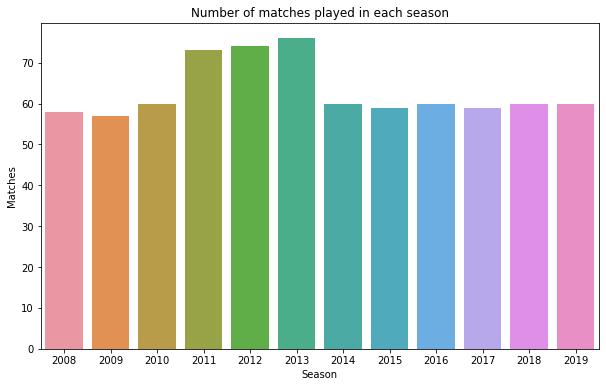

In [12]:
plt.figure(figsize=(10,6))
sns.countplot("season",data=df)
plt.title("Number of matches played in each season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()

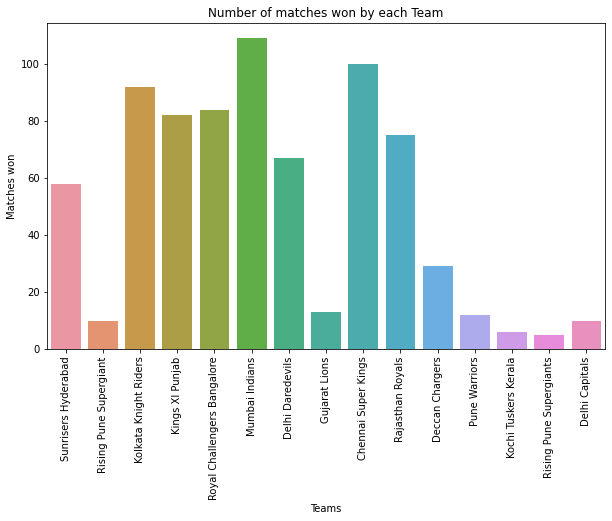

In [13]:
plt.figure(figsize=(10,6))
sns.countplot("winner",data=df)
plt.title("Number of matches won by each Team")
plt.xlabel("Teams")
plt.xticks(rotation=90)
plt.ylabel("Matches won")
plt.show()

In [14]:
df.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


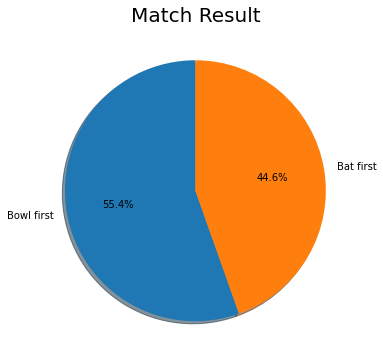

In [15]:
df["win_by"]=np.where(df["win_by_runs"]>0, "Bat first","Bowl first")
Win=df.win_by.value_counts()
labels=np.array(Win.index)
sizes=Win.values
plt.figure(figsize=(10,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%",shadow=True,startangle=90)
plt.title("Match Result",fontsize=20)
plt.show()

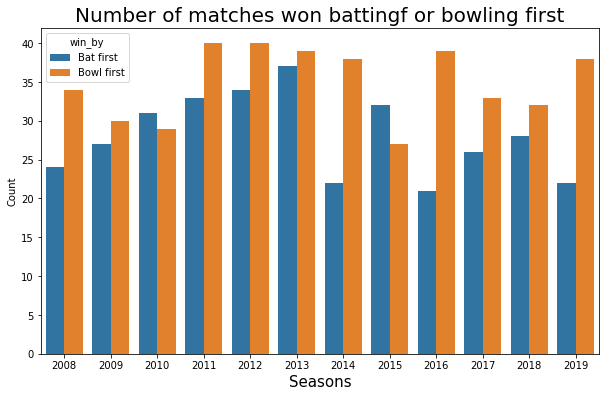

In [16]:
plt.figure(figsize=(10,6))
sns.countplot('season',hue="win_by",data=df,)
plt.title("Number of matches won battingf or bowling first",fontsize=20)
plt.xlabel("Seasons",fontsize=15)
plt.ylabel("Count")
plt.show()

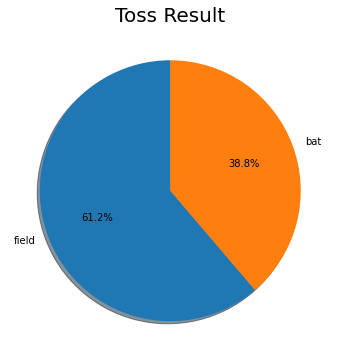

In [17]:
Toss=df.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes=Toss.values
plt.figure(figsize=(10,6))
plt.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=True,startangle=90)
plt.title("Toss Result",fontsize=20)
plt.show()

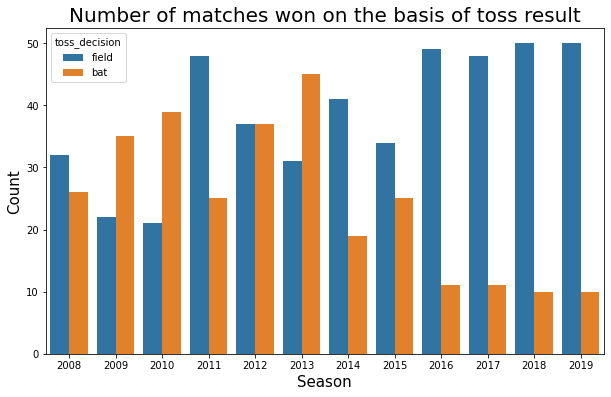

In [18]:
plt.figure(figsize=(10,6))
sns.countplot("season",hue="toss_decision",data=df)
plt.title("Number of matches won on the basis of toss result",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [19]:
#Season wise winner list of teams

final_matches=df.drop_duplicates(subset=["season"],keep="last")
final_matches[["season","winner"]].sort_values("season")

,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians


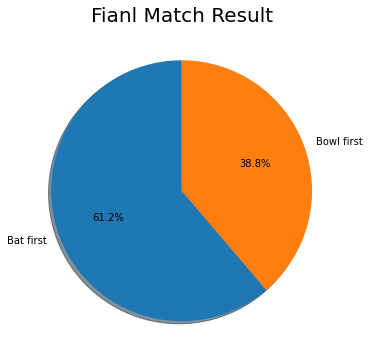

In [20]:
match=final_matches.win_by.value_counts()
labels=np.array(match.index)
size=match.values
plt.figure(figsize=(10,6))
plt.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=True,startangle=90)
plt.title("Fianl Match Result",fontsize=20)
plt.show()

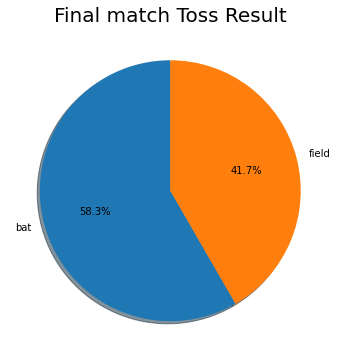

In [21]:
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes=Toss.values 
plt.figure(figsize=(10,6))
plt.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=True,startangle=90)
plt.title("Final match Toss Result",fontsize=20)
plt.show()

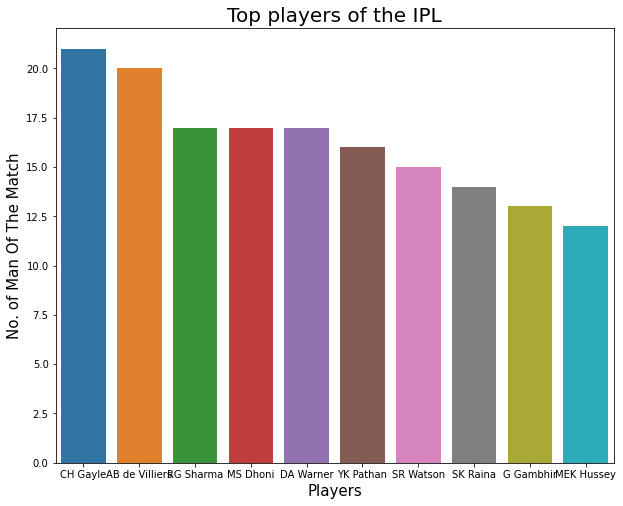

In [22]:
#Finding the top players of IPL

plt.figure(figsize=(10,8))
top_players=df.player_of_match.value_counts()[:10]
sns.barplot(x=top_players.index,y=top_players,data=df)
plt.title("Top players of the IPL",fontsize=20)
plt.xlabel("Players",fontsize=15)
plt.ylabel("No. of Man Of The Match",fontsize=15)
plt.show()

In [23]:
#We will print the final values and winner along with the number of wins

final_matches.groupby(["city","winner"]).size()


city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [24]:
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [25]:
final_matches[["season","toss_winner","toss_decision","winner","player_of_match"]].sort_values("season")

,season,toss_winner,toss_decision,winner,player_of_match
116,2008,Rajasthan Royals,field,Rajasthan Royals,YK Pathan
173,2009,Royal Challengers Bangalore,field,Deccan Chargers,A Kumble
233,2010,Chennai Super Kings,bat,Chennai Super Kings,SK Raina
306,2011,Chennai Super Kings,bat,Chennai Super Kings,M Vijay
380,2012,Chennai Super Kings,bat,Kolkata Knight Riders,MS Bisla
456,2013,Mumbai Indians,bat,Mumbai Indians,KA Pollard
516,2014,Kolkata Knight Riders,field,Kolkata Knight Riders,MK Pandey
575,2015,Chennai Super Kings,field,Mumbai Indians,RG Sharma
635,2016,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,BCJ Cutting
58,2017,Mumbai Indians,bat,Mumbai Indians,KH Pandya


In [26]:
season_data=df[["id","season","winner"]]
complete_data=df_balls.merge(season_data,how="inner",left_on="match_id",right_on="id")
complete_data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


In [27]:
complete_data.dropna()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
11,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,2.0,5.0,DA Warner,S Dhawan,A Choudhary,0.0,...,0.0,0.0,0.0,0.0,DA Warner,caught,Mandeep Singh,1,2017,Sunrisers Hyderabad
64,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,11.0,3.0,S Dhawan,MC Henriques,STR Binny,0.0,...,0.0,0.0,0.0,0.0,S Dhawan,caught,Sachin Baby,1,2017,Sunrisers Hyderabad
94,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,16.0,2.0,MC Henriques,Yuvraj Singh,YS Chahal,0.0,...,0.0,0.0,0.0,0.0,MC Henriques,caught,Sachin Baby,1,2017,Sunrisers Hyderabad
165,1,2.0,Royal Challengers Bangalore,Sunrisers Hyderabad,7.0,3.0,CH Gayle,TM Head,DJ Hooda,0.0,...,0.0,0.0,0.0,0.0,CH Gayle,caught,DA Warner,1,2017,Sunrisers Hyderabad
199,1,2.0,Royal Challengers Bangalore,Sunrisers Hyderabad,12.0,4.0,KM Jadhav,TM Head,MC Henriques,0.0,...,0.0,1.0,0.0,1.0,KM Jadhav,run out,BCJ Cutting,1,2017,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143032,605,1.0,Rising Pune Supergiants,Mumbai Indians,10.0,2.0,SPD Smith,SS Tiwary,JJ Bumrah,0.0,...,0.0,0.0,0.0,0.0,SPD Smith,caught,PA Patel,605,2016,Mumbai Indians
143049,605,1.0,Rising Pune Supergiants,Mumbai Indians,13.0,1.0,PSP Handscomb,SS Tiwary,Harbhajan Singh,0.0,...,0.0,0.0,0.0,0.0,PSP Handscomb,caught,JC Buttler,605,2016,Mumbai Indians
143083,605,1.0,Rising Pune Supergiants,Mumbai Indians,18.0,3.0,SS Tiwary,MS Dhoni,JJ Bumrah,0.0,...,0.0,0.0,0.0,0.0,SS Tiwary,caught,HH Pandya,605,2016,Mumbai Indians
143095,605,1.0,Rising Pune Supergiants,Mumbai Indians,20.0,2.0,MS Dhoni,NLTC Perera,JJ Bumrah,0.0,...,0.0,0.0,0.0,0.0,MS Dhoni,caught,AT Rayudu,605,2016,Mumbai Indians


In [28]:
#Number of fours by each team and runs from it

four_data=complete_data[complete_data["batsman_runs"]==4]
four_data.groupby("batting_team")["batsman_runs"].agg([("runs by fours","sum"),("fours","count")])


,runs by fours,fours
batting_team,,
Chennai Super Kings,7080.0,1770
Deccan Chargers,3828.0,957
Delhi Daredevils,7492.0,1873
Gujarat Lions,1364.0,341
Kings XI Punjab,7908.0,1977
Kochi Tuskers Kerala,680.0,170
Kolkata Knight Riders,7540.0,1885
Mumbai Indians,8332.0,2083
Pune Warriors,2100.0,525


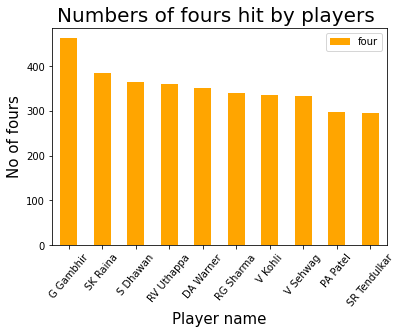

In [32]:
# we will plot graph on four hit by players
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='orange')
plt.title("Numbers of fours hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

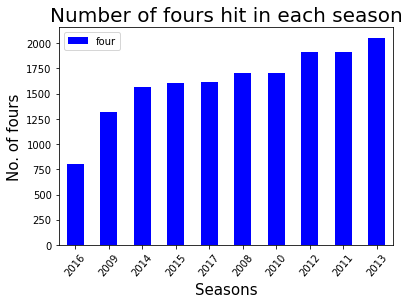

In [34]:
season_four=four_data.groupby("season")["batsman_runs"].agg([("four","count")]).sort_values("four")
ax=season_four.reset_index().plot("season","four",kind="bar",color="Blue")
plt.title("Number of fours hit in each season",fontsize=20)
plt.xlabel("Seasons",fontsize=15)
plt.ylabel("No. of fours",fontsize=15)
plt.xticks(rotation=50)
plt.show()

In [38]:
#number of six hit by each team and runs from it

six_data=complete_data[complete_data.batsman_runs==6]
six_data.groupby("batting_team")["batsman_runs"].agg([("runs from six","sum"),("sixes","count")])

,runs from six,sixes
batting_team,,
Chennai Super Kings,4452.0,742
Deccan Chargers,2400.0,400
Delhi Daredevils,3906.0,651
Gujarat Lions,726.0,121
Kings XI Punjab,4392.0,732
Kochi Tuskers Kerala,318.0,53
Kolkata Knight Riders,3714.0,619
Mumbai Indians,5016.0,836
Pune Warriors,1176.0,196


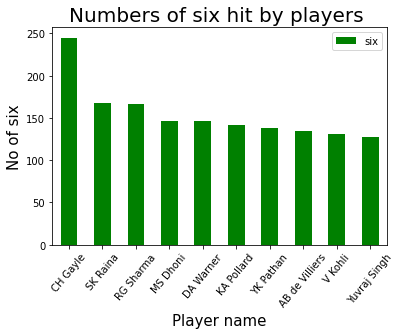

In [42]:
#Plot to show the number of sixes hit by players

batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='green')
plt.title("Numbers of six hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

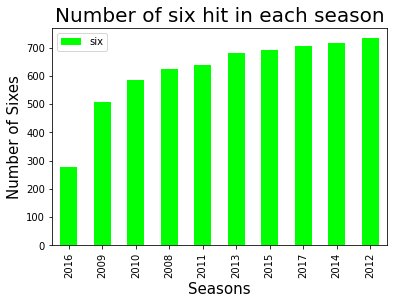

In [43]:
season_six=six_data.groupby("season")["batsman_runs"].agg([("six","count")]).reset_index().sort_values("six")
ax=season_six.plot("season","six",kind="bar",color="lime")
plt.title("Number of six hit in each season",fontsize=20)
plt.xlabel("Seasons",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Number of Sixes",fontsize=15)
plt.show()

In [62]:
#Top 10 leading Run scorer of IPL

batsman_score=df_balls.groupby("batsman")["batsman_runs"].agg(["sum"]).reset_index().sort_values("sum",ascending=False)
batsman_score=batsman_score.rename(columns={"sum":"Batsman_runs"})
print("TOP 10 Leading Run Scorer Of IPL")
batsman_score.head(10)

TOP 10 Leading Run Scorer Of IPL


,batsman,Batsman_runs
369,SK Raina,4377.0
319,RG Sharma,4053.0
134,G Gambhir,3933.0
425,V Kohli,3831.0
336,RV Uthappa,3626.0
102,DA Warner,3552.0
84,CH Gayle,3425.0
255,MS Dhoni,3422.0
343,S Dhawan,3241.0
22,AB de Villiers,3115.0


In [68]:
#Number of matches played by players
No_Matches_player= df_balls[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player.head(5)


,batsman,No_of Matches
0,SK Raina,128
1,RG Sharma,124
2,G Gambhir,123
3,RV Uthappa,120
4,V Kohli,111


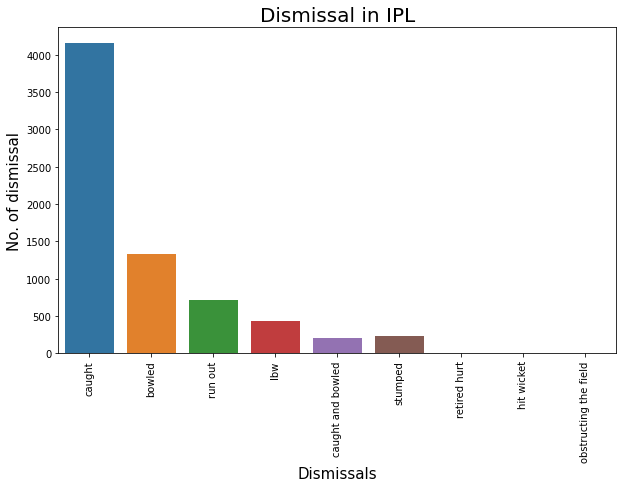

In [70]:
#Dismissal in IPL

plt.figure(figsize=(10,6))
sns.countplot(df_balls.dismissal_kind)
plt.title("Dismissal in IPL",fontsize=20)
plt.xlabel("Dismissals",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("No. of dismissal",fontsize=15)
plt.show()

In [76]:
#Top wicket takers in IPL

wicket_data=df_balls.dropna(subset=["dismissal_kind"])
wicket_data=wicket_data[~wicket_data["dismissal_kind"].isin(["run out","retired hut","obstructing the field"])]
Bowler_wkt=wicket_data.groupby("bowler")["dismissal_kind"].agg(["count"]).reset_index().sort_values("count",ascending=False)
Bowler_wkt.head(10)

,bowler,count
255,SL Malinga,154
5,A Mishra,129
104,Harbhajan Singh,123
200,PP Chawla,119
78,DJ Bravo,115
215,R Vinay Kumar,100
7,A Nehra,99
307,Z Khan,99
44,B Kumar,98
92,DW Steyn,92


**Conclusions:** 


The highest number of match played in IPL season was 
2013,2014,2015.

The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.

Teams which Bowl first has higher chances of winning then the team which bat first.

After winning toss more teams decide to do fielding first.

In finals teams which decide to do fielding first win the matches more then the team which bat first.

In finals most teams after winning toss decide to do fielding first.

Top player of match winning are CH gayle, AB de villers.

It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL.

The highest number of four hit by player is Shikar Dhawan.

The highest number of six hit by player is CH gayle.

Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.

The highest number of matches played by player name are SK Raina, RG Sharma.

Dismissals in IPL was most by Catch out .

The IPL most wicket taken blower is SL Malinga.